1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [7]:
import pandas as pd
file_path="D:/GIT1/Homework/src/data/2023_6/open_rank_20236.csv"
df = pd.read_csv(file_path)
top_100=df[df['rank']<=100]
value_stats=top_100['value'].describe()
median_value=top_100['value'].median()
print(f"最大值: {value_stats['max']}")
print(f"最小值: {value_stats['min']}")
print(f"均值: {value_stats['mean']}")
print(f"中位数: {median_value}")

最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [ ]:
import pandas as pd  
import numpy as np  
  
file_path = 'D:/GIT1/Homework/src/data/2022/activity_2022.csv'  
df = pd.read_csv(file_path)  
  
df.columns = ['repo', '20221_value', '20222_value', '20223_value', '20224_value', '20225_value', '20226_value', '20227_value', '20228_value', '20229_value', '202210_value', '202211_value', '202212_value']  

values_df = df.set_index('repo').dropna(axis=1, thresh=len(df) - (df.isnull().sum(axis=0) > 0).sum()) 
values = values_df.values  

def calculate_average_growth_rate(values):  
    values = np.array(values, dtype=float)  
    growth_rates = []  
    for i in range(1, len(values)):  
        growth_rate = (values[i] - values[i-1]) / values[i-1]  
        growth_rates.append(growth_rate)   
    average_growth_rate = np.mean(growth_rates)  
    return average_growth_rate  

average_growth_rates = []  
for row in values:  
    average_growth_rate = calculate_average_growth_rate(row)  
    average_growth_rates.append(average_growth_rate)  
df['average_growth_rate'] = average_growth_rates  
print(df[['repo', 'average_growth_rate']])

                                     repo  average_growth_rate
0                MicrosoftDocs/azure-docs            -0.017928
1                           NixOS/nixpkgs             0.000295
2                          dotnet/runtime            -0.022848
3                          elastic/kibana            -0.003651
4  firstcontributions/first-contributions             0.140824
5                         flutter/flutter            -0.012404
6                     home-assistant/core             0.008453
7                        microsoft/vscode             0.022905
8                         pytorch/pytorch             0.013160
9                          rust-lang/rust            -0.003778


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

China data has 10 companies.
Global data has 10 companies.
count        10.000000
mean      61205.500000
std       49332.487917
min       11741.000000
25%       30943.500000
50%       39141.000000
75%       82179.500000
max      167814.000000
Name: issue_comment, dtype: float64
count    1.000000e+01
mean     3.414094e+05
std      4.226103e+05
min      7.853000e+04
25%      9.780075e+04
50%      1.786290e+05
75%      3.156160e+05
max      1.437317e+06
Name: issue_comment, dtype: float64


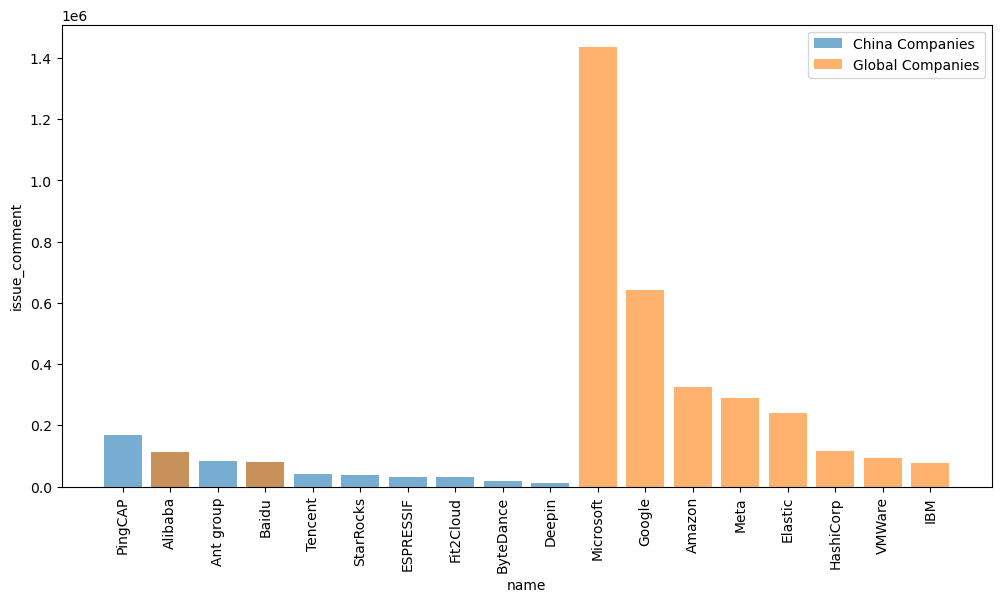

In [ ]:
import pandas as pd

china_data = pd.read_csv('D:/GIT1/Homework/src/data/2022/china_2022.csv')
global_data = pd.read_csv('D:/GIT1/Homework/src/data/2022/global_2022.csv')


print(f"China data has {china_data.shape[0]} companies.")
print(f"Global data has {global_data.shape[0]} companies.")

print(china_data['issue_comment'].describe())
print(global_data['issue_comment'].describe())

import matplotlib.pyplot as plt

china_data_sorted = china_data[['name', 'issue_comment']].sort_values(by='issue_comment', ascending=False)
global_data_sorted = global_data[['name', 'issue_comment']].sort_values(by='issue_comment', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(china_data_sorted['name'], china_data_sorted['issue_comment'], label='China Companies', alpha=0.6)
plt.bar(global_data_sorted['name'], global_data_sorted['issue_comment'], label='Global Companies', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('name')
plt.ylabel('issue_comment')
plt.legend()
plt.show()



4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [31]:
p_a = 0.25  
p_not_a = 0.75  
p_b_given_a = 0.85  
p_b_given_not_a = 0.1  
numerator = p_b_given_a * p_a
denominator = p_b_given_a * p_a + p_b_given_not_a * p_not_a
print(numerator / denominator)

0.7391304347826088


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [41]:
p_c = 0.5  
p_not_c = 0.5  
p_d_given_c = 0.35 
p_d_given_not_c = 0.1  
numerator = p_d_given_c * p_c
denominator = p_d_given_c * p_c + p_d_given_not_c * p_not_c
print(numerator / denominator)

0.7777777777777778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

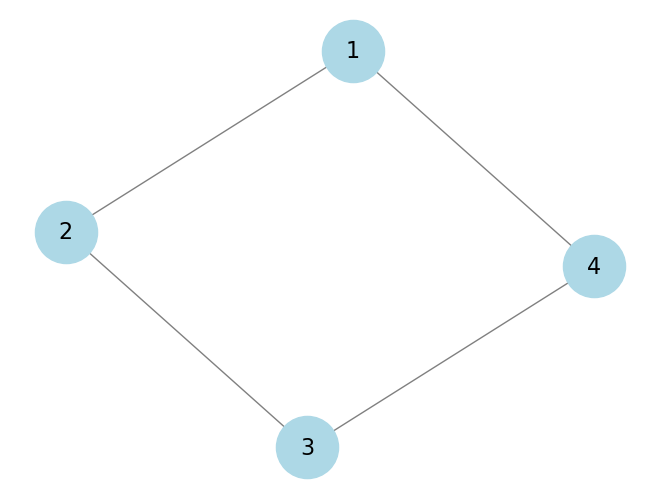

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=16)
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

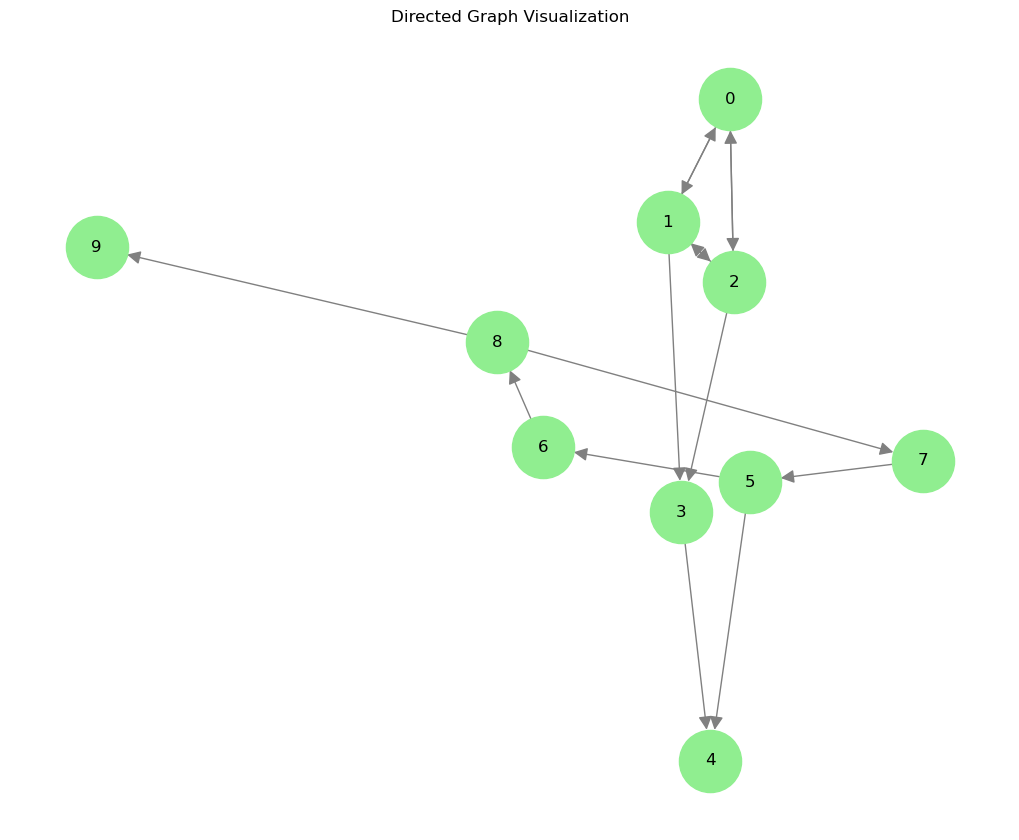

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), 
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', 
        node_size=2000, font_size=12, arrowsize=20)
plt.title("Directed Graph Visualization")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

PageRank values for each node:
Node 0: 0.0950
Node 1: 0.1055
Node 2: 0.1055
Node 3: 0.0950
Node 4: 0.1593
Node 5: 0.1020
Node 6: 0.0786
Node 7: 0.0786
Node 8: 0.1020
Node 9: 0.0786


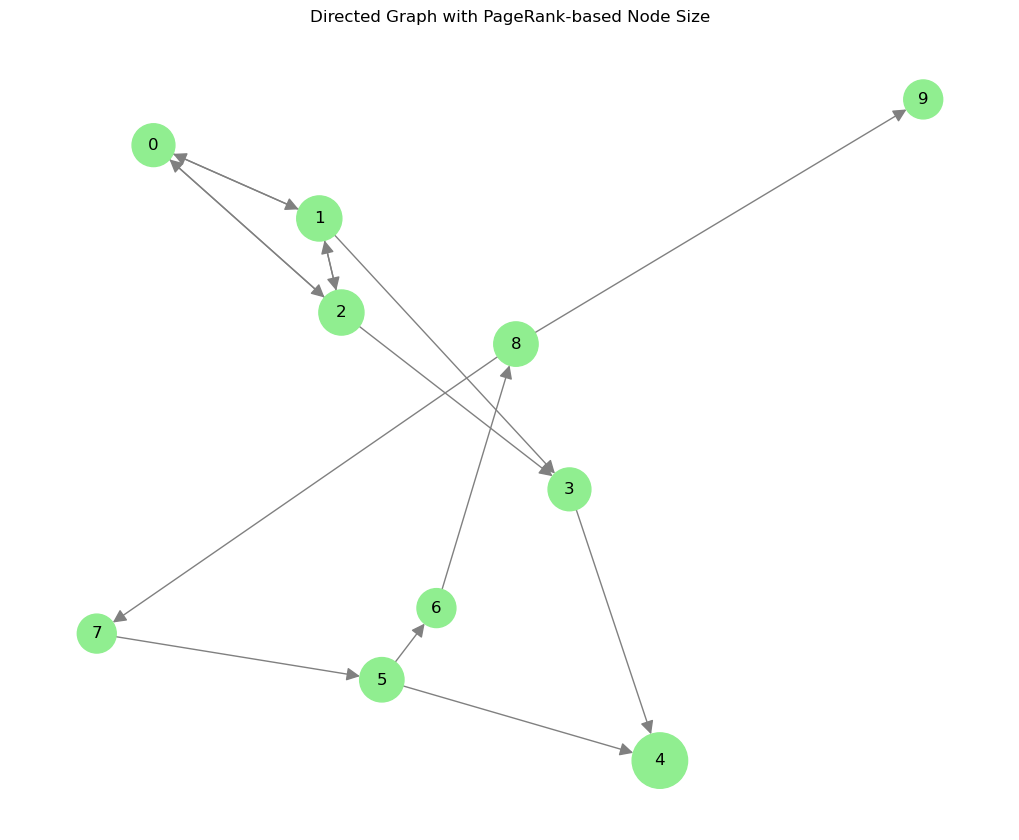

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(users)
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), 
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G.add_edges_from(edges)
pagerank_values = nx.pagerank(G)
print("PageRank values for each node:")
for node, value in pagerank_values.items():
    print(f"Node {node}: {value:.4f}")
node_sizes = [pagerank_values[node] * 10000 for node in G.nodes] 
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', 
        node_size=node_sizes, font_size=12, arrowsize=20)
plt.title("Directed Graph with PageRank-based Node Size")
plt.show()